In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 69 Jun 11 13:20 kaggle.json
100% 3.57G/3.58G [01:05<00:00, 47.7MB/s]
100% 3.58G/3.58G [01:05<00:00, 58.6MB/s]


In [3]:
import zipfile
import os

curDir = os.getcwd()
print(curDir)

local_zip = '/content/fruits-fresh-and-rotten-for-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')

zip_ref.close()

/content


Using TensorFlow backend.


(356, 270)


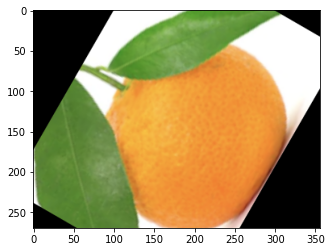

In [4]:
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

filenames = os.listdir('/content/dataset/train/freshoranges')
sample = random.choice(filenames)
image = load_img('/content/dataset/train/freshoranges/'+sample)
plt.imshow(image)
print(image.size)

In [0]:
import shutil

shutil.rmtree('/content/dataset/dataset')
os.remove('fruits-fresh-and-rotten-for-classification.zip')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/dataset/train', 
        target_size=(150, 150),
        batch_size=15,
	      class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(150, 150),
        batch_size=15,
	      class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(GlobalMaxPooling2D())


# model.add(Dropout(0.25))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))
# model.add(Dense(128))
# model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)       

In [8]:
history = model.fit_generator(
              train_generator,    
              epochs=30, 
              validation_data = validation_generator,
              verbose=1
              )

Epoch 1/30
727/727 [==============================] - 75s 103ms/step - loss: 0.5970 - accuracy: 0.7803 - val_loss: 0.1729 - val_accuracy: 0.8866
Epoch 2/30
727/727 [==============================] - 67s 92ms/step - loss: 0.2956 - accuracy: 0.8951 - val_loss: 0.1823 - val_accuracy: 0.9110
Epoch 3/30
727/727 [==============================] - 67s 92ms/step - loss: 0.2277 - accuracy: 0.9173 - val_loss: 0.2925 - val_accuracy: 0.9318
Epoch 4/30
727/727 [==============================] - 65s 89ms/step - loss: 0.1759 - accuracy: 0.9382 - val_loss: 0.1175 - val_accuracy: 0.9466
Epoch 5/30
727/727 [==============================] - 65s 89ms/step - loss: 0.1324 - accuracy: 0.9526 - val_loss: 0.0759 - val_accuracy: 0.9481
Epoch 6/30
727/727 [==============================] - 65s 89ms/step - loss: 0.1159 - accuracy: 0.9598 - val_loss: 0.2800 - val_accuracy: 0.9218
Epoch 7/30
727/727 [==============================] - 66s 90ms/step - loss: 0.0920 - accuracy: 0.9664 - val_loss: 0.0093 - val_accuracy

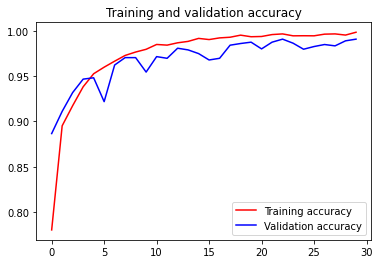

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=15)
  # print(fn)
  # print(classes)
  class_list = ['fresh apple', 'fresh banana', 'fresh orange', 'rotten apple', 'rotten banana', 'rotten orange']
  print('{} is a {}'.format(fn, class_list[classes.argmax(axis=-1)[0]]))


Saving rotten-overripe-soft-banana-on-white-background-DBW8WH.jpg to rotten-overripe-soft-banana-on-white-background-DBW8WH (1).jpg
rotten-overripe-soft-banana-on-white-background-DBW8WH.jpg is a rotten banana


In [0]:
model.save('rotten-fresh-model.h5') 

# Save the entire model as a SavedModel.
# !mkdir -p saved_model
# model.save('saved_model/my_model') 